In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_3',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_3',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.3_.3_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_5e-25',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_3',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_3',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.3_.3_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_5e-25',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1100

nband = 115

nv = 200

dv = 0.005

tsfc = 294.0

ng = 3

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 3 /)

data wgt
     &     /.3, .3, .9/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 5e-25

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

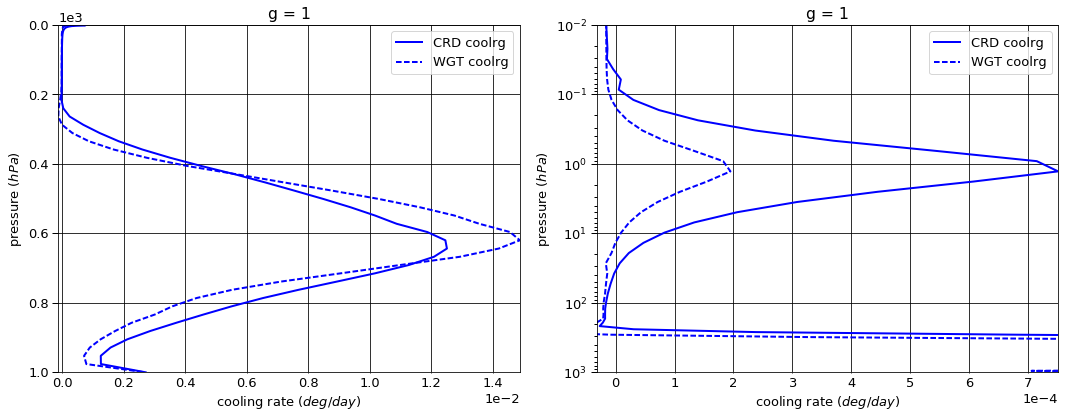

# Figure: cooling rate g-group 2

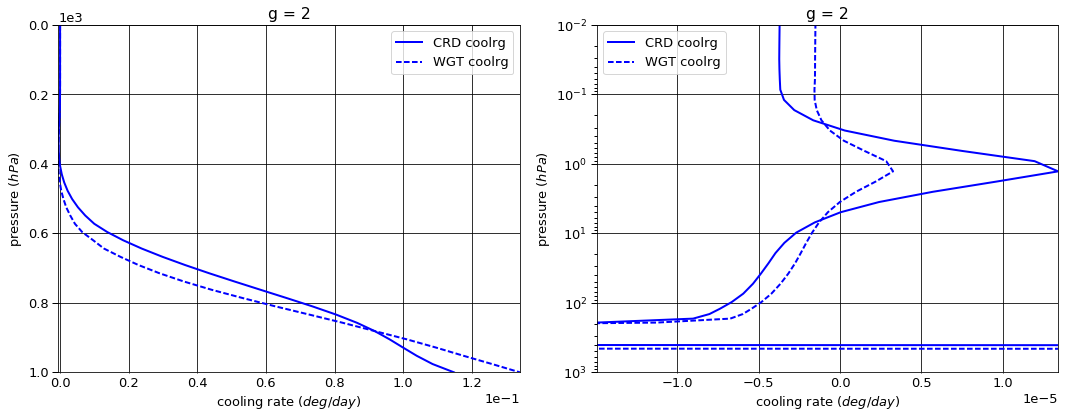

# Figure: cooling rate g-group 3

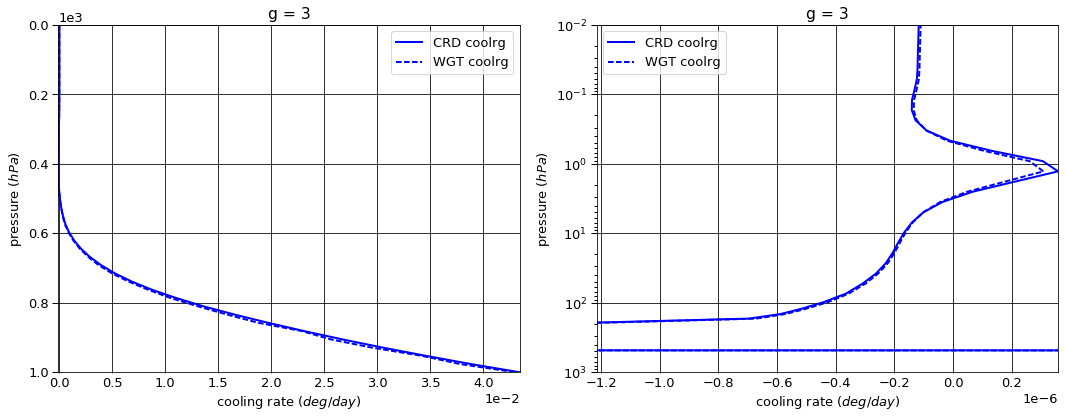

# Figure: cooling rate g-group total

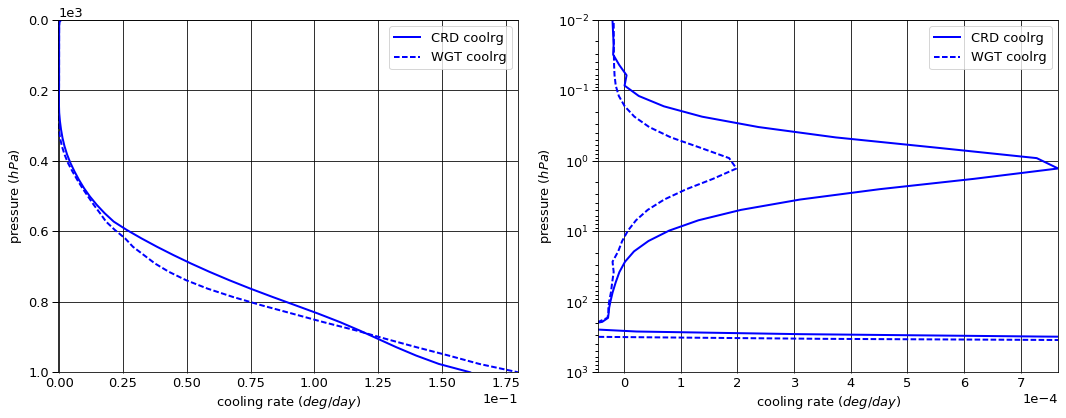

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.551613  0.000000  -0.551613
  1013.0   76     -1.042072  1.032373  -0.009699
2 0.0      1      -8.558705  0.000000  -8.558705
  1013.0   76     -9.430838  4.319710  -5.111128
3 0.0      1     -12.668144  0.000000 -12.668144
  1013.0   76    -12.796750  0.946521 -11.850229


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.542117  0.000000  -0.542117
  1013.0   76     -1.042072  1.034066  -0.008006
2 0.0      1      -8.780943  0.000000  -8.780943
  1013.0   76     -9.430838  3.850182  -5.580655
3 0.0      1     -12.673943  0.000000 -12.673943
  1013.0   76    -12.796750  0.916937 -11.879813


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.009497  0.000000  0.009497
  1013.0   76     0.000000  0.001693  0.001693
2 0.0      1     -0.222238  0.000000 -0.222238
  1013.0   76     0.000000 -0.469527 -0.469527
3 0.0      1     -0.005799  0.000000 -0.005799
  1013.0   76     0.000000 -0.029584 -0.029584

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -2.138340e-05
  1001.112500 75     2.710045e-03
2 0.000312    1     -3.614190e-06
  1001.112500 75     1.148035e-01
3 0.000312    1     -1.088419e-07
  1001.112500 75     4.345772e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.656333e-05
  1001.112500 75     2.676911e-03
2 0.000312    1     -1.447679e-06
  1001.112500 75     1.340216e-01
3 0.000312    1     -1.027898e-07
  1001.112500 75     4.305409e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      4.820074e-06
  1001.112500 75    -3.313390e-05
2 0.000312    1      2.166511e-06
  1001.112500 75     1.921813e-02
3 0.000312    1      6.052110e-09
  1001.112500 75    -4.036290e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-21.778462,0.000000,-21.778462
1013.0,76,-23.269659,6.298604,-16.971056



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-21.997003,0.000000,-21.997003
1013.0,76,-23.269659,5.801185,-17.468474



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.218541,0.000000,-0.218541
1013.0,76,0.000000,-0.497418,-0.497418


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000025
1001.112500,75,0.160971



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000018
1001.112500,75,0.179753



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000007
1001.112500,75,0.018781


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.04613,0.044296
2,0.41687,0.401093
3,0.53700,0.554611


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.835681e-23
2,5.000596e-25
3,3.773541e-26


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [3]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.835681e-23,NaN,0.04613,0.044296,0.04613,0.044296,600.0
2,5.000596e-25,0.017635,0.41687,0.401093,0.46300,0.445389,600.0
3,3.773541e-26,0.075462,0.53700,0.554611,1.00000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog       ratio
layer g                                                     
1     1     0.000312  8.315707e-23  1.046789e-24   79.440137
      2     0.000312  3.044535e-25  9.508434e-27   32.019314
      3     0.000312  5.043237e-27  3.654019e-28   13.801888
2     1     0.000750  8.370835e-23  1.049124e-24   79.788807
      2     0.000750  3.061084e-25  9.540584e-27   32.084869
      3     0.000750  5.077016e-27  3.668819e-28   13.838286
3     1     0.001052  8.488840e-23  1.053405e-24   80.584734
      2     0.001052  3.096460e-25  9.604568e-27   32.239453
      3     0.001052  5.149509e-27  3.698945e-28   13.921561
4     1     0.001476  8.615142e-23  1.058056e-24   81.424241
      2     0.001476  3.134292e-25  9.673366e-27   32.401254
      3     0.001476  5.227591e-27  3.731248e-28   14.010300
5     1     0.002070  8.742980e-23  1.062906e-24   82.255425
      2     0.002070  3.172555e-25  9.743786e-27   32.559772
      3     0.002070  5.307159e-27  3.764156e-28   14.099201
6     1     0.002904  8.872239e-23  1.068035e-24   83.070631
      2     0.002904  3.211219e-25  9.816315e-27   32.713076
      3     0.002904  5.388182e-27  3.797814e-28   14.187589
7     1     0.004074  9.002918e-23  1.073564e-24   83.860112
      2     0.004074  3.250289e-25  9.891754e-27   32.858570
      3     0.004074  5.470706e-27  3.832478e-28   14.274594
8     1     0.005714  9.135011e-23  1.079659e-24   84.610146
      2     0.005714  3.289771e-25  9.971224e-27   32.992651
      3     0.005714  5.554784e-27  3.868510e-28   14.358975
9     1     0.008015  9.268530e-23  1.086559e-24   85.301684
      2     0.008015  3.329679e-25  1.005633e-26   33.110286
      3     0.008015  5.640496e-27  3.906435e-28   14.438984
10    1     0.011243  9.403430e-23  1.094595e-24   85.907886
      2     0.011243  3.370012e-25  1.014930e-26   33.204392
      3     0.011243  5.727904e-27  3.946981e-28   14.512113
11    1     0.015771  9.539650e-23  1.104229e-24   86.391985
      2     0.015771  3.410772e-25  1.025327e-26   33.265201
      3     0.015771  5.817091e-27  3.991185e-28   14.574847
12    1     0.022122  9.677186e-23  1.116106e-24   86.704913
      2     0.022122  3.451983e-25  1.037270e-26   33.279489
      3     0.022122  5.908216e-27  4.040537e-28   14.622353
13    1     0.031031  9.816037e-23  1.131115e-24   86.781986
      2     0.031031  3.493682e-25  1.051380e-26   33.229482
      3     0.031031  6.001501e-27  4.097153e-28   14.647978
14    1     0.043528  9.965299e-23  1.150753e-24   86.598088
      2     0.043528  3.538626e-25  1.068972e-26   33.103062
      3     0.043528  6.103295e-27  4.166204e-28   14.649532
15    1     0.061057  1.041641e-22  1.186001e-24   87.828049
      2     0.061057  3.673571e-25  1.105805e-26   33.220800
      3     0.061057  6.411116e-27  4.321899e-28   14.834025
16    1     0.085645  1.170181e-22  1.255987e-24   93.168224
      2     0.085645  4.057058e-25  1.189094e-26   34.118896
      3     0.085645  7.323553e-27  4.695323e-28   15.597548
17    1     0.120136  1.372187e-22  1.360539e-24  100.856190
      2     0.120136  4.662778e-25  1.313531e-26   35.498046
      3     0.120136  8.889795e-27  5.271633e-28   16.863457
18    1     0.168516  1.605382e-22  1.494059e-24  107.451070
      2     0.168516  5.373511e-25  1.463827e-26   36.708640
      3     0.168516  1.092551e-26  5.996467e-28   18.219915
19    1     0.236378  1.868077e-22  1.666776e-24  112.077330
      2     0.236378  6.197348e-25  1.650797e-26   37.541547
      3     0.236378  1.354810e-26  6.940003e-28   19.521757
20    1     0.331549  2.162149e-22  1.893134e-24  114.210050
      2     0.331549  7.159209e-25  1.893356e-26   37.812266
      3     0.331549  1.695234e-26  8.211460e-28   20.644738
21    1     0.465100  2.489076e-22  2.191850e-24  113.560500
      2     0.465100  8.291073e-25  2.218371e-26   37.374590
      3     0.465100  2.139850e-26  9.973718e-28   21.454889
22    1     0.652400  2.847815e-22  2.584332e-2

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
